            Montecarlo Simulation

In [1]:
## Installing Packages

import pandas as pd
import numpy as np
import datetime as dt   
import yfinance as yf
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

In [2]:
#Time Interval & Stocks

start_date = '2020-01-01'
end_date = '2025-01-31'
tickers  = ['AAPL','MSFT','NVDA','AMZN','GOOGL','2222.SR','META','TSLA','AVGO','TSM']

In [33]:
#Data Download from Yahoo Finance. 
data = yf.download(tickers, start=start_date, end = end_date)['Close']
data.ffill(inplace=True)
data.head()

[*********************100%***********************]  10 of 10 completed


Ticker        2222.SR       AAPL       AMZN       AVGO      GOOGL        META  \
Date                                                                            
2020-01-01  24.970943        NaN        NaN        NaN        NaN         NaN   
2020-01-02  25.006512  72.796005  94.900497  27.986179  68.186813  208.981689   
2020-01-03  25.006512  72.088287  93.748497  27.274355  67.830109  207.875916   
2020-01-05  24.579659  72.088287  93.748497  27.274355  67.830109  207.875916   
2020-01-06  24.544090  72.662712  95.143997  27.233551  69.638054  211.790985   

Ticker            MSFT      NVDA       TSLA        TSM  
Date                                                    
2020-01-01         NaN       NaN        NaN        NaN  
2020-01-02  153.630707  5.972710  28.684000  54.504326  
2020-01-03  151.717728  5.877113  29.534000  52.706882  
2020-01-05  151.717728  5.877113  29.534000  52.706882  
2020-01-06  152.109940  5.901757  30.102667  52.098652

In [34]:
#Replace the NaN values
data.ffill(inplace= True)
print(data.head())

Ticker        2222.SR       AAPL       AMZN       AVGO      GOOGL        META  \
Date                                                                            
2020-01-01  24.970943        NaN        NaN        NaN        NaN         NaN   
2020-01-02  25.006512  72.796005  94.900497  27.986179  68.186813  208.981689   
2020-01-03  25.006512  72.088287  93.748497  27.274355  67.830109  207.875916   
2020-01-05  24.579659  72.088287  93.748497  27.274355  67.830109  207.875916   
2020-01-06  24.544090  72.662712  95.143997  27.233551  69.638054  211.790985   

Ticker            MSFT      NVDA       TSLA        TSM  
Date                                                    
2020-01-01         NaN       NaN        NaN        NaN  
2020-01-02  153.630707  5.972710  28.684000  54.504326  
2020-01-03  151.717728  5.877113  29.534000  52.706882  
2020-01-05  151.717728  5.877113  29.534000  52.706882  
2020-01-06  152.109940  5.901757  30.102667  52.098652  


In [35]:
data.loc['2020-01-01'] = data.loc['2020-01-01'].fillna(0)
data.head()

Ticker        2222.SR       AAPL       AMZN       AVGO      GOOGL        META  \
Date                                                                            
2020-01-01  24.970943   0.000000   0.000000   0.000000   0.000000    0.000000   
2020-01-02  25.006512  72.796005  94.900497  27.986179  68.186813  208.981689   
2020-01-03  25.006512  72.088287  93.748497  27.274355  67.830109  207.875916   
2020-01-05  24.579659  72.088287  93.748497  27.274355  67.830109  207.875916   
2020-01-06  24.544090  72.662712  95.143997  27.233551  69.638054  211.790985   

Ticker            MSFT      NVDA       TSLA        TSM  
Date                                                    
2020-01-01    0.000000  0.000000   0.000000   0.000000  
2020-01-02  153.630707  5.972710  28.684000  54.504326  
2020-01-03  151.717728  5.877113  29.534000  52.706882  
2020-01-05  151.717728  5.877113  29.534000  52.706882  
2020-01-06  152.109940  5.901757  30.102667  52.098652

In [24]:
data.loc['2020-01-01'] = data.loc['2020-01-01'].fillna(0)
data.head()

Ticker        2222.SR       AAPL       AMZN       AVGO      GOOGL        META  \
Date                                                                            
2020-01-01  24.970943   0.000000   0.000000   0.000000   0.000000    0.000000   
2020-01-02  25.006512  72.796005  94.900497  27.986179  68.186813  208.981689   
2020-01-03  25.006512  72.088287  93.748497  27.274355  67.830109  207.875916   
2020-01-05  24.579659  72.088287  93.748497  27.274355  67.830109  207.875916   
2020-01-06  24.544090  72.662712  95.143997  27.233551  69.638054  211.790985   

Ticker            MSFT      NVDA       TSLA        TSM  
Date                                                    
2020-01-01    0.000000  0.000000   0.000000   0.000000  
2020-01-02  153.630707  5.972710  28.684000  54.504326  
2020-01-03  151.717728  5.877113  29.534000  52.706882  
2020-01-05  151.717728  5.877113  29.534000  52.706882  
2020-01-06  152.109940  5.901757  30.102667  52.098652

In [36]:
daily_returns = data.pct_change().dropna()
daily_returns.head()

Ticker       2222.SR      AAPL      AMZN      AVGO     GOOGL      META  \
Date                                                                     
2020-01-02  0.001424       inf       inf       inf       inf       inf   
2020-01-03  0.000000 -0.009722 -0.012139 -0.025435 -0.005231 -0.005291   
2020-01-05 -0.017070  0.000000  0.000000  0.000000  0.000000  0.000000   
2020-01-06 -0.001447  0.007968  0.014886 -0.001496  0.026654  0.018834   
2020-01-07 -0.004348 -0.004703  0.002092 -0.003443 -0.001932  0.002164   

Ticker          MSFT      NVDA      TSLA       TSM  
Date                                                
2020-01-02       inf       inf       inf       inf  
2020-01-03 -0.012452 -0.016006  0.029633 -0.032978  
2020-01-05  0.000000  0.000000  0.000000  0.000000  
2020-01-06  0.002585  0.004193  0.019255 -0.011540  
2020-01-07 -0.009118  0.012107  0.038801  0.016205

In [37]:
daily_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
daily_returns.dropna(inplace=True)
daily_returns.head()

Ticker       2222.SR      AAPL      AMZN      AVGO     GOOGL      META  \
Date                                                                     
2020-01-03  0.000000 -0.009722 -0.012139 -0.025435 -0.005231 -0.005291   
2020-01-05 -0.017070  0.000000  0.000000  0.000000  0.000000  0.000000   
2020-01-06 -0.001447  0.007968  0.014886 -0.001496  0.026654  0.018834   
2020-01-07 -0.004348 -0.004703  0.002092 -0.003443 -0.001932  0.002164   
2020-01-08 -0.004367  0.016086 -0.007809 -0.012474  0.007118  0.010138   

Ticker          MSFT      NVDA      TSLA       TSM  
Date                                                
2020-01-03 -0.012452 -0.016006  0.029633 -0.032978  
2020-01-05  0.000000  0.000000  0.000000  0.000000  
2020-01-06  0.002585  0.004193  0.019255 -0.011540  
2020-01-07 -0.009118  0.012107  0.038801  0.016205  
2020-01-08  0.015928  0.001875  0.049205  0.007373

In [38]:
daily_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
daily_returns.dropna(inplace=True)
daily_returns.head()

Ticker       2222.SR      AAPL      AMZN      AVGO     GOOGL      META  \
Date                                                                     
2020-01-03  0.000000 -0.009722 -0.012139 -0.025435 -0.005231 -0.005291   
2020-01-05 -0.017070  0.000000  0.000000  0.000000  0.000000  0.000000   
2020-01-06 -0.001447  0.007968  0.014886 -0.001496  0.026654  0.018834   
2020-01-07 -0.004348 -0.004703  0.002092 -0.003443 -0.001932  0.002164   
2020-01-08 -0.004367  0.016086 -0.007809 -0.012474  0.007118  0.010138   

Ticker          MSFT      NVDA      TSLA       TSM  
Date                                                
2020-01-03 -0.012452 -0.016006  0.029633 -0.032978  
2020-01-05  0.000000  0.000000  0.000000  0.000000  
2020-01-06  0.002585  0.004193  0.019255 -0.011540  
2020-01-07 -0.009118  0.012107  0.038801  0.016205  
2020-01-08  0.015928  0.001875  0.049205  0.007373

                    Basics Measures
                    

                    Daily

In [31]:
mean_return = daily_returns.mean()
std_deviation = daily_returns.std()


                Annualized

In [15]:
expected_returns = daily_returns.mean()*252
cov_matrix = daily_returns.cov()*252


C:\Users\Daniel\AppData\Local\Temp\ipykernel_14164\1871713486.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df[x] = prices_series
C:\Users\Daniel\AppData\Local\Temp\ipykernel_14164\1871713486.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df[x] = prices_series
C:\Users\Daniel\AppData\Local\Temp\ipykernel_14164\1871713486.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all c

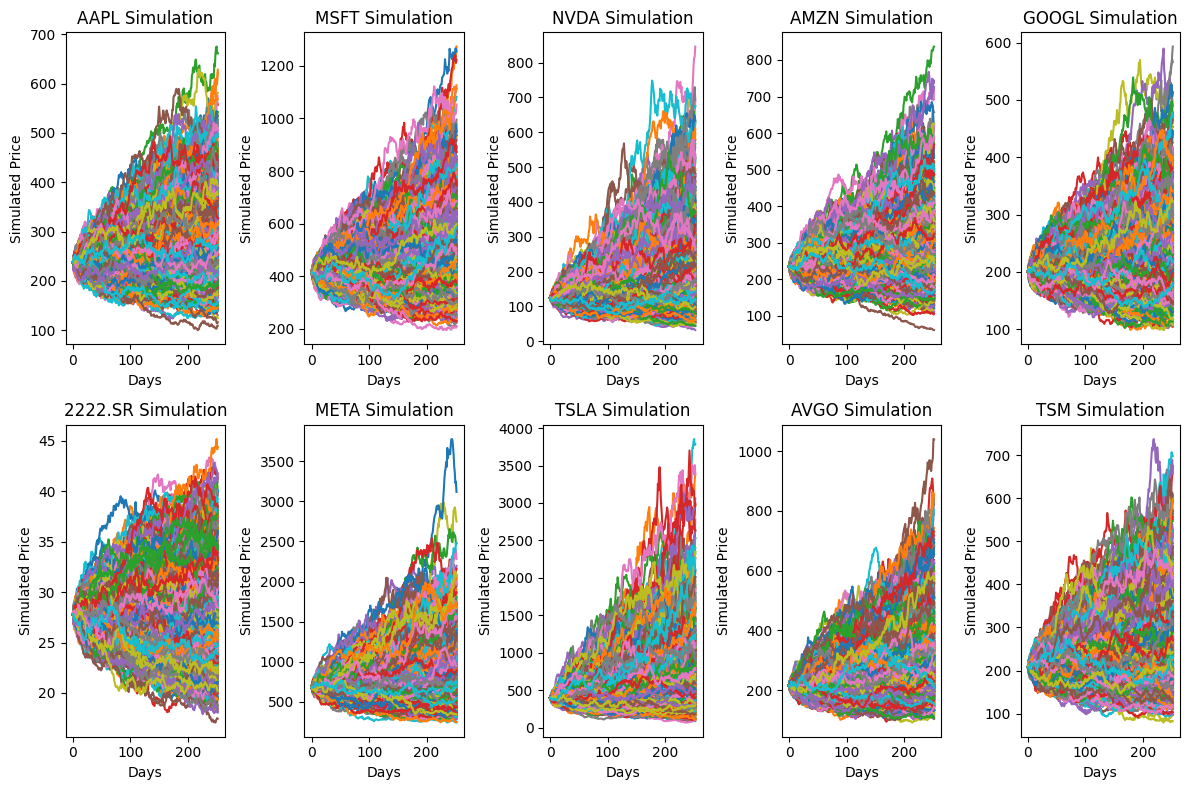

In [39]:
num_simulations = 1000
num_days = 252 #total días mercado x año


#ultimo precio de accion conocido
last_price = data.iloc[-1]

#generar las simulaciones

# Generar simulaciones para cada ticker
plt.figure(figsize=(12, 8))

for i, ticker in enumerate(tickers):
    simulation_df = pd.DataFrame()
    
    for x in range(num_simulations):
        # Generar retornos aleatorios para este ticker
        daily_returns_sim = np.random.normal(mean_return[ticker], std_deviation[ticker], num_days)
        
        # Calcular la serie de precios simulados
        prices_series = [last_price[ticker]]
        for ret in daily_returns_sim:
            prices_series.append(prices_series[-1] * (1 + ret))
        
        # Almacenar la simulación
        simulation_df[x] = prices_series
    
    # Graficar las simulaciones para este ticker
    plt.subplot(2, 5, i + 1)
    plt.plot(simulation_df)
    plt.title(f"{ticker} Simulation")
    plt.xlabel('Days')
    plt.ylabel('Simulated Price')

plt.tight_layout()
plt.show()